In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

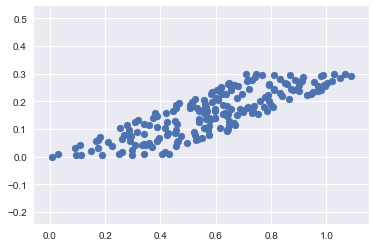

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.rand(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(model.components_)

[[-0.9534372  -0.30159162]
 [ 0.30159162 -0.9534372 ]]


In [5]:
print(model.explained_variance_)

[0.06022031 0.00197053]


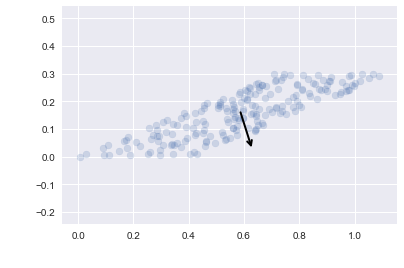

In [6]:
# using the "components" to define the direction of the vector, 
# and the "explained variance" to define the squared-length of the vector:

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(model.explained_variance_, model.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(model.mean_, model.mean_ + v)
plt.axis('equal');

In [8]:
# The projection of each data point onto the principal axes are the "principal components" of the data.
pca = PCA(n_components=1)
pca.fit(X)
x_pca = pca.transform(X)
print('Original shape: ',X.shape)
print('Transformed shape: ',x_pca.shape)

('Original shape: ', (200, 2))
('Transformed shape: ', (200, 1))


In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)
